In [1]:
%matplotlib inline

import math
import numpy as np
import numpy.linalg as la
from importlib import reload
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import \
    beta, norm, gamma, kstest, alpha, \
    t, recipinvgauss, ncf, ksone, johnsonsu, \
    maxwell, weibull_min, weibull_max
import pandas as pd
import matplotlib.ticker as ticker
a4_dims = (11.7, 1*8.27)

In [2]:
import src.analysis.tms_entropy as tms
reload(tms)

<module 'src.analysis.tms_entropy' from '/home/garro/Projects/masterarbeit/src/analysis/tms_entropy.py'>

In [3]:
import src.analysis.state_entropy as state_h
reload(state_h)

<module 'src.analysis.state_entropy' from '/home/garro/Projects/masterarbeit/src/analysis/state_entropy.py'>

In [288]:
file='/media/sf_VBoxshare/MasterarbeitDaten/ProbSAT/probsat-2.3.db'

df1 = state_h.get_unsat_clause_avg_to_hamming_dist(file)
df12 = state_h.get_unsat_clause_to_hamming_dist(file)
df2 = state_h.get_state_entropy_avg_to_hamming_dist(file)
df22 = state_h.get_state_entropy_to_hamming_dist(file)

In [4]:
sns.set_style("whitegrid")
sns.set_context("paper")

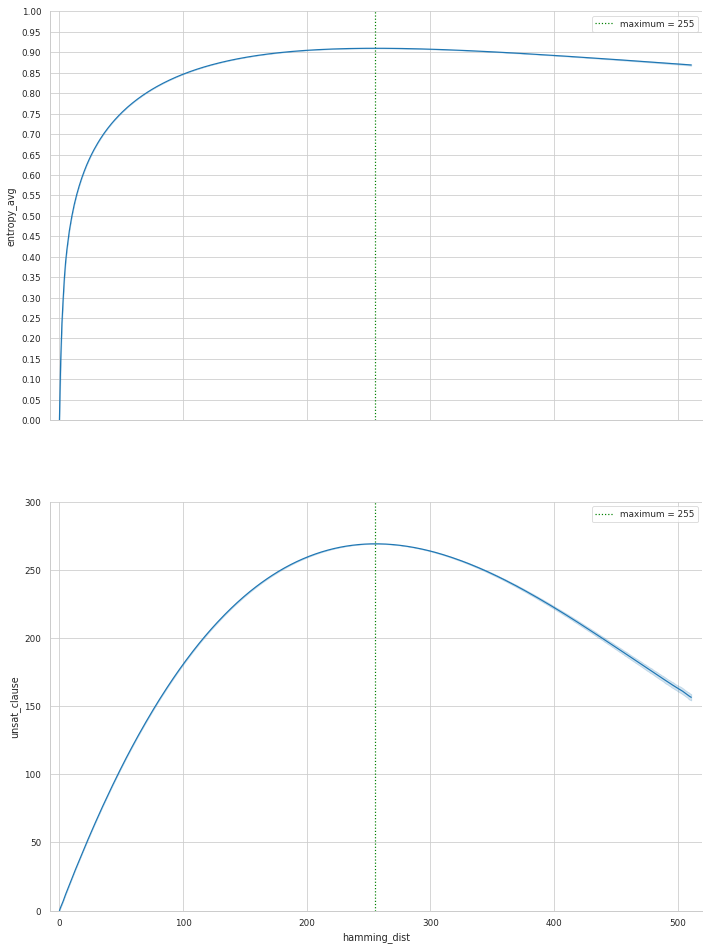

In [320]:
a4_dims = (11.7, 2*8.27)

fig, (ax_h, ax_c) = plt.subplots(2, 1, figsize=a4_dims, sharex=True)
ax_h.set_ylim([0.0,1.0])
ax_c.set_ylim([0,300])
ax_h.set_xlim([-8,520])

_, max_idx_1 = df1.idxmax()
ax_c.axvline(x=max_idx_1, label=f'maximum = {max_idx_1}', color='g', linestyle=':')

_, max_idx_2 = df2.idxmax()
ax_h.axvline(x=max_idx_2, label=f'maximum = {max_idx_2}', color='g', linestyle=':')


sns.lineplot(x='hamming_dist',y='unsat_clause', data=df12, ax=ax_c, estimator=np.mean)
sns.lineplot(x='hamming_dist',y='entropy_avg', data=df22, ax=ax_h, estimator=np.mean)
sns.despine()
ax_h.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

In [3]:
import src.analysis.dynamic_entropy as path_h
reload(path_h)

field='mutual_information'

df0 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'minimum_at')
df1 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'maximum_at')
df2 = state_h.get_state_entropy_avg_to_hamming_dist('probsat_test.db')
fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=a4_dims, sharex=True)
sns.distplot(df0['value'], ax=ax1, fit=beta, kde=False)
sns.distplot(df1['value'], ax=ax2, fit=beta, kde=False)
ax0.set_xlim([0,64])

_, max_idx_2 = df2.idxmax()
ax0.axvline(x=max_idx_2, label=f'maximum = {max_idx_2}', color='g')
ax1.axvline(x=max_idx_2, label=f'maximum = {max_idx_2}', color='g')
ax2.axvline(x=max_idx_2, label=f'maximum = {max_idx_2}', color='g')

sns.lineplot(x='hamming_dist', y='entropy_avg', data=df2, ax=ax0, color='r', label='average')

NameError: name 'state_h' is not defined

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/lib/python3.7/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


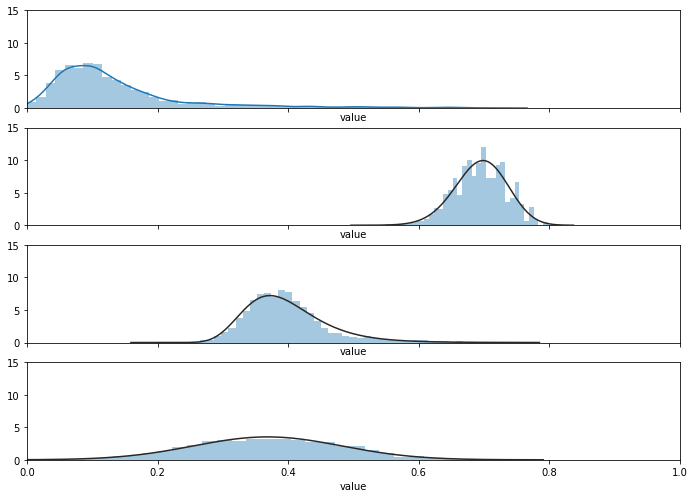

In [4]:
reload(path_h)

field='mutual_information'

df0 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'minimum')
df1 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'maximum')
df2 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'average')
df3 = path_h.path_entropy_to_performance('probsat_test.db', f'{field}', 'latest')

fig, (ax0, ax1, ax2, ax3) = plt.subplots(4, 1, figsize=a4_dims, sharex=True)
ax0.set_xlim([0,1])
ax0.set_ylim([0,15])
ax1.set_ylim([0,15])
ax2.set_ylim([0,15])
ax3.set_ylim([0,15])

sns.distplot(df0['value'], ax=ax0, kde=True, hist=True)
sns.distplot(df1['value'], ax=ax1, fit=beta, kde=False, hist=True)
sns.distplot(df2['value'], ax=ax2, fit=alpha, kde=False, hist=True)
sns.distplot(df3['value'], ax=ax3, fit=norm, kde=False, hist=True)

In [37]:
import src.analysis.dynamic_entropy as path_h
reload(path_h)

value='average'
entropy='single_entropy'

In [38]:
df_ps_all = path_h.noise_param_to_path_entropy(
    '/media/sf_VBoxshare/MasterarbeitDaten/ProbSAT',
    f'{entropy}',
    f'{value}'
)

In [39]:
df_ws_all = path_h.noise_param_to_path_entropy(
    '/media/sf_VBoxshare/MasterarbeitDaten/WalkSAT',
    f'{entropy}',
    f'{value}'
)

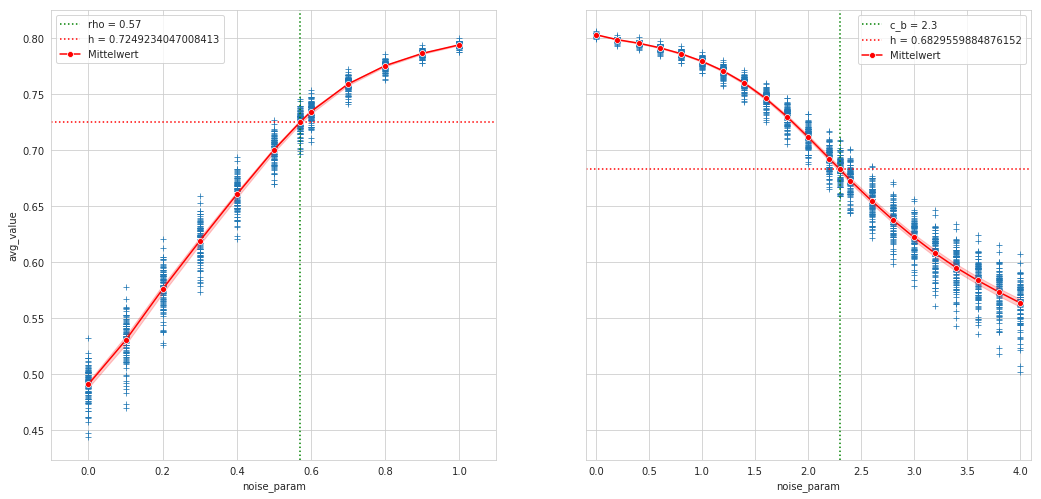

In [42]:
a4_dims = (1.5*11.7, 8.27)
fig, (ax_ws, ax_ps) = plt.subplots(1, 2, sharey=True, figsize=a4_dims)
ax_ps.set_xlim([-0.1,4.1])
ax_ws.set_xlim([-0.1,1.1])

ax_ws.axvline(x=0.57, label=f'rho = 0.57', color='g', linestyle=':')
ax_ps.axvline(x=2.3, label=f'c_b = 2.3', color='g', linestyle=':')

ax_ws.axhline(y=ws_opt_mean, label=f'h = {ws_opt_mean}', color='r', linestyle=':')
ax_ps.axhline(y=ps_opt_mean, label=f'h = {ps_opt_mean}', color='r', linestyle=':')

sns.set_style("whitegrid")

sns.scatterplot(
    x='noise_param', y='avg_value', #, size='runtime',
    data=df_ps_all,
    marker='+', ax=ax_ps, 
)

sns.lineplot(
    x='noise_param', y='avg_value', #, size='runtime',
    data=df_ps_all, estimator=np.mean, color='r',
    marker='o', label=f'Mittelwert', ax=ax_ps, 
)

sns.scatterplot(
    x='noise_param', y='avg_value',#, size='runtime',
    data=df_ws_all,
    marker='+', ax=ax_ws, 
)

sns.lineplot(
    x='noise_param', y='avg_value', #, size='runtime',
    data=df_ws_all, estimator=np.mean, color='r',
    marker='o', label=f'Mittelwert', ax=ax_ws, 
)


In [32]:
reload(path_h)

df_ws = path_h.noise_param_to_path_entropy(
    '/media/sf_VBoxshare/MasterarbeitDaten/WalkSAT_Opt',
    f'{entropy}',
    f'{value}'
)

In [33]:
df_ps = path_h.noise_param_to_path_entropy(
    '/media/sf_VBoxshare/MasterarbeitDaten/ProbSAT_Opt',
    f'{entropy}',
    f'{value}'
)

In [34]:
df_gs = path_h.noise_param_to_path_entropy(
    '/media/sf_VBoxshare/MasterarbeitDaten/GSAT/Test',
    f'{entropy}',
    f'{value}'
)

In [ ]:
ws_opt_mean = np.mean(df_ws['avg_value'])
ws_opt_std = np.std(df_ws['avg_value'])
ps_opt_mean = np.mean(df_ps['avg_value'])
ps_opt_std = np.std(df_ps['avg_value'])

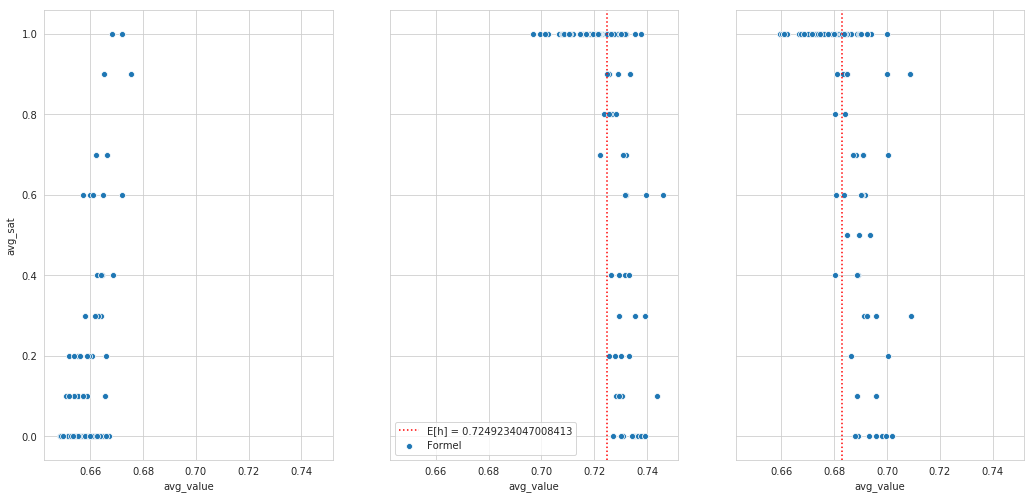

In [35]:
a4_dims = (1.5*11.7, 8.27)
fig, (ax_gs, ax_ws, ax_ps) = plt.subplots(1, 3, figsize=a4_dims, sharey=True, sharex=True)
lim=[0.35,0.65]
#ax_ps.set_xlim(lim)
#ax_ws.set_xlim(lim)
#ax_gs.set_xlim(lim)
max_flips = 20*512*600

ax_ws.axvline(x=ws_opt_mean, label=f'E[h] = {ws_opt_mean}', color='r', linestyle=':')
ax_ps.axvline(x=ps_opt_mean, label=f'E[h] = {ps_opt_mean}', color='r', linestyle=':')

#ax_ps.axhline(y=max_flips, label=f'Maximum Flips {max_flips}', color='g', linestyle=':')
#ax_ws.axhline(y=max_flips, label=f'Maximum Flips {max_flips}', color='g', linestyle=':')
#ax_gs.axhline(y=max_flips, label=f'Maximum Flips {max_flips}', color='g', linestyle=':')

sns.set_style("whitegrid")

y='avg_sat'

plot = sns.scatterplot(
    x='avg_value', y=y, #, size='runtime',
    data=df_ps,#[ps_issat],
    marker='o', label=f'Formel', ax=ax_ps,
    legend=False, 
)

sns.scatterplot(
    x='avg_value', y=y, #, size='runtime',
    data=df_ws,#[ws_issat],
    marker='o', label=f'Formel', ax=ax_ws, 
    legend='brief', 
)

sns.scatterplot(
    x='avg_value', y=y, #, size='runtime',
    data=df_gs,#[gs_issat],
    marker='o', label=f'Formel', ax=ax_gs, 
    legend=False, 
)

fig.savefig('fig.pdf')

#### Note

- At the left hand side of the mean, there are no failures, and relatively low runtimes
- All failures are on the right hand side